In [2]:
#IMPORTS AND SETUP 
import os
from pathlib import Path
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
confusion_matrix, ConfusionMatrixDisplay,
classification_report, accuracy_score, f1_score, recall_score, precision_score,
roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
brier_score_loss
)
from sklearn.calibration import calibration_curve

# Ensure reports folder exists
ROOT = Path.cwd()
REPORTS_DIR = ROOT / 'reports'
REPORTS_DIR.mkdir(parents=True, exist_ok=True)


# Increase plot aesthetics
sns.set(style='whitegrid')
plt.rcParams.update({'figure.dpi': 150})


print('Working dir:', ROOT)
print('Reports will be saved to:', REPORTS_DIR)

Working dir: /Users/aparnasajeevan/Documents/autism-diagnostic-support-tool/notebooks
Reports will be saved to: /Users/aparnasajeevan/Documents/autism-diagnostic-support-tool/notebooks/reports


In [4]:
# CELL 2 — Load Model, Scaler, Label Encoders, and Test Data

import pandas as pd
import numpy as np
import joblib
import os

# Paths (auto from previous cell)
model_path = os.path.join(os.getcwd(), "../models/best_model.pkl")
scaler_path = os.path.join(os.getcwd(), "../models/scaler.pkl")
enc_path = os.path.join(os.getcwd(), "../models/label_encoders.pkl")

X_test_path = os.path.join(os.getcwd(), "../data/processed/X_test.csv")
y_test_path = os.path.join(os.getcwd(), "../data/processed/y_test.csv")

print("Loading model & artifacts...")
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
encoders = joblib.load(enc_path)

print("Loading test data...")
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path).squeeze()

print("Shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Loading model & artifacts...
Loading test data...
Shapes:
X_test: (141, 19)
y_test: (141,)


📊 PERFORMANCE METRICS (XGBoost)
Accuracy : 0.9858156028368794
F1 Score : 0.9736842105263158
Recall   : 0.9736842105263158

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       103
           1       0.97      0.97      0.97        38

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141



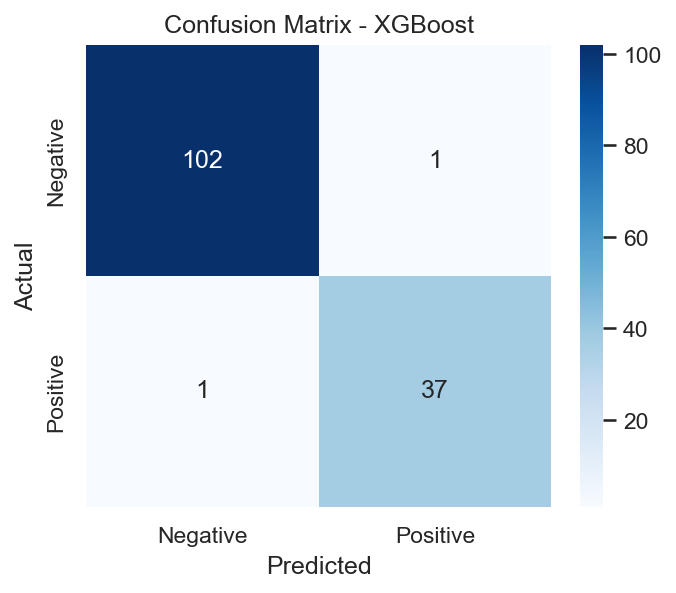

Confusion matrix saved to: reports/confusion_matrix.png


In [5]:
# CELL 3 — Confusion Matrix & Classification Report (XGBoost)

from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    f1_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure scaling uses the exact same order
X_test_scaled = X_test.copy()
X_test_scaled[X_test.columns] = scaler.transform(X_test[X_test.columns])

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("📊 PERFORMANCE METRICS (XGBoost)")
print("Accuracy :", acc)
print("F1 Score :", f1)
print("Recall   :", rec)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")

# Save plot
os.makedirs("reports", exist_ok=True)
save_path = "reports/confusion_matrix.png"
plt.savefig(save_path, dpi=200, bbox_inches="tight")

plt.show()

print(f"Confusion matrix saved to: {save_path}")


AUC: 0.9994890137966275


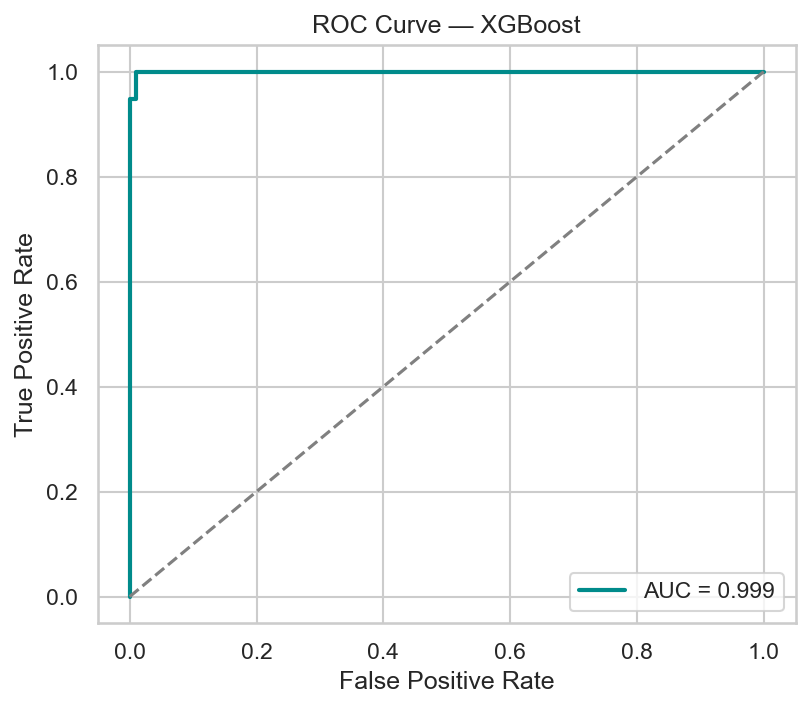

ROC curve saved to: reports/roc_curve.png


In [6]:
# CELL 4 — ROC Curve + AUC (XGBoost)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Compute FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkcyan", lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost")
plt.legend(loc="lower right")

# Save
os.makedirs("reports", exist_ok=True)
save_path = "reports/roc_curve.png"
plt.savefig(save_path, dpi=200, bbox_inches="tight")

plt.show()

print(f"ROC curve saved to: {save_path}")


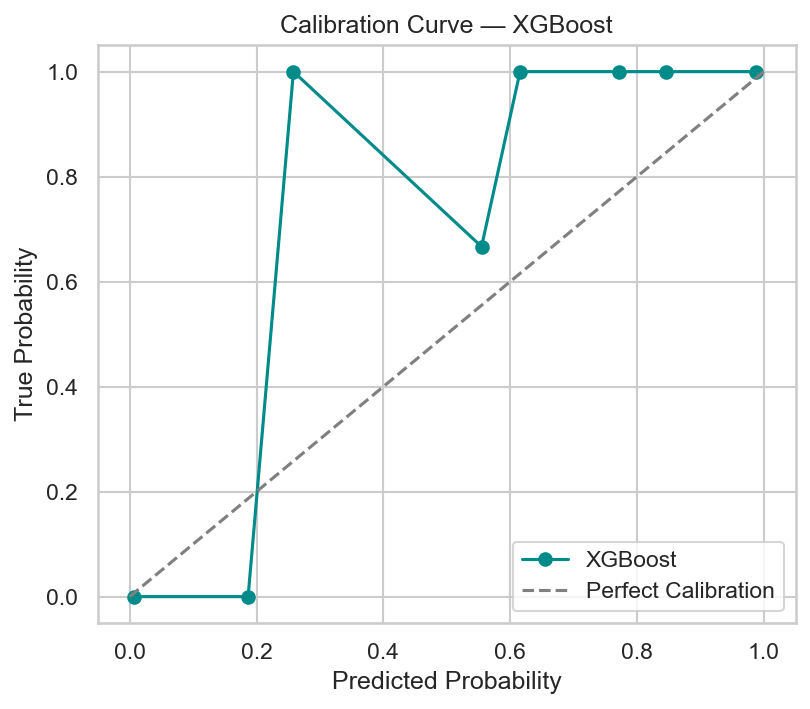

Calibration curve saved to: reports/calibration_curve.png


In [7]:
# CELL 5 — Calibration Curve (Reliability Diagram)


from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Compute calibration data
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o', color="darkcyan", label="XGBoost")
plt.plot([0,1],[0,1], linestyle="--", color="gray", label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve — XGBoost")
plt.legend()

# Save plot
save_path = "reports/calibration_curve.png"
plt.savefig(save_path, dpi=200, bbox_inches="tight")
plt.show()

print(f"Calibration curve saved to: {save_path}")
